滑动窗口算法

https://labuladong.github.io/article/fname.html?fname=滑动窗口技巧进阶

In [ ]:
# 3. 无重复字符的最长子串
# https://leetcode.cn/problems/longest-substring-without-repeating-characters/

from collections import defaultdict
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        window = defaultdict(int)
        left = 0
        right = 0
        res = 0
        while right < len(s):
            keyr = s[right]
            window[keyr] += 1
            right += 1
            while window[keyr] > 1:
                keyl = s[left]
                window[keyl] -= 1
                left += 1
            res = max(res, right - left)
        return res

In [2]:
t = input()
need = {}
for i in t:
    need[i] = need.get(i, 0) + 1
print(need)

{'q': 2, 'w': 1, 'd': 3}


In [ ]:
# 76. 最小覆盖子串
# https://leetcode.cn/problems/minimum-window-substring/

from collections import defaultdict
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        need = defaultdict(int)
        for i in range(len(t)):
            need[t[i]] += 1
        window = defaultdict(int)
        left = 0
        right = 0
        valid = 0
        length = float('inf')
        start = 0
        while right < len(s):
            keyr = s[right]
            if keyr in need:
                window[keyr] += 1
                if window[keyr] == need[keyr]:
                    valid += 1
            right += 1
            while valid == len(need):
                keyl = s[left]
                if right - left < length:
                    start = left
                    length = right - left
                left += 1
                if keyl in need:
                    if window[keyl] == need[keyl]:
                        valid -= 1
                    window[keyl] -= 1
        return '' if length == float('inf') else s[start:start + length]

In [3]:
from collections import defaultdict
need = defaultdict(int)
t = 'ABCC'
for i in range(len(t)):
    need[t[i]] += 1
print(need)

defaultdict(<class 'int'>, {'A': 1, 'B': 1, 'C': 2})


In [ ]:
def addTwoNumbers(l1, l2):
        l3, l4 = [], []
        for i in range(len(l1)):
            l3.append(l1.pop())
        for i in range(len(l2)):
            l4.append(l2.pop())
        s1 = int(''.join(list(map(str, l3))))
        s2 = int(''.join(list(map(str, l4))))
        s = s1 + s2
        l = [int(x) for x in str(s)][::-1]
        return l
l1 = list(map(int, input().split()))
l2 = list(map(int, input().split()))
print(addTwoNumbers(l1, l2))

In [6]:
# 567. 字符串的排列
# https://leetcode.cn/problems/permutation-in-string/

'''from collections import defaultdict # 题目理解错了
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        need = defaultdict(int)
        for i in range(len(s1)):
            need[s1[i]] += 1
        window = defaultdict(int)
        right = 0
        valid = 0
        while right < len(s2):
            keyr = s2[right]
            if keyr in need:
                window[keyr] += 1
                if window[keyr] == need[keyr]:
                    valid += 1
            right += 1
            if valid == len(need):
                return True
        return False
a = Solution()
a.checkInclusion(s1 = "ab", s2 = "eidbaooo")'''

from collections import defaultdict
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        # need = window = defaultdict(int) 不能这样定义，它们引用的是同一个 defaultdict 对象
        need = defaultdict(int)
        window = defaultdict(int)
        left = right = valid = 0
        for i in range(len(s1)):
            need[s1[i]] += 1
        while right < len(s2):
            keyr = s2[right]
            right += 1
            if keyr in need:
                window[keyr] += 1
                if window[keyr] == need[keyr]:
                    valid += 1
            while right - left >= len(s1):
                if valid == len(need):
                    return True
                keyl = s2[left]
                left += 1
                if keyl in need:
                    if window[keyl] == need[keyl]:
                        valid -= 1
                    window[keyl] -= 1
        return False

True

In [ ]:
# 438. 找到字符串中所有字母异位词
# https://leetcode.cn/problems/find-all-anagrams-in-a-string/

from collections import defaultdict
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        need = defaultdict(int)
        window = defaultdict(int)
        for i in range(len(p)):
            need[p[i]] += 1
        left = right = valid = 0
        res = []
        while right < len(s):
            keyr = s[right]
            right += 1
            if keyr in need:
                window[keyr] += 1
                if window[keyr] == need[keyr]:
                    valid += 1
            while right - left >= len(p):
                if valid == len(need):
                    res.append(left)
                keyl = s[left]
                left += 1
                if keyl in need:
                    if window[keyl] == need[keyl]:
                        valid -= 1
                    window[keyl] -= 1
        return res

In [3]:
# 209. 长度最小的子数组
# https://leetcode.cn/problems/minimum-size-subarray-sum/

from collections import defaultdict
class Solution:
    def minSubArrayLen(self, target: int, nums) -> int:
        window = defaultdict(int)
        left = right = res = 0
        length = float('inf')
        while right < len(nums):
            keyr = nums[right]
            right += 1
            res += keyr
            while res >= target:
                if right - left < length:
                    length = right - left
                keyl = nums[left]
                left += 1
                res -= keyl
        return 0 if length == float('inf') else length

2

In [ ]:
# 1208. 尽可能使字符串相等
# https://leetcode.cn/problems/get-equal-substrings-within-budget/

class Solution:
    def equalSubstring(self, s: str, t: str, maxCost: int) -> int:
        nums = []
        for i in range(len(s)):
            nums.append(abs(ord(s[i])-ord(t[i])))
        left = right = res = length = 0
        while right < len(nums):
            keyr = nums[right]
            right += 1
            res += keyr
            while res > maxCost:
                keyl = nums[left]
                left += 1
                res -= keyl
            length = max(length, right - left)
        return length

In [4]:
nums = ''
s = "abcd"
t = "bcdf"
for i in range(len(s)):
    nums += str(abs(ord(s[i])-ord(t[i])))
print(nums)

1112


In [5]:
nums = []
s = "abcd"
t = "bcdf"
for i in range(len(s)):
    nums.append(abs(ord(s[i])-ord(t[i])))
print(nums)

[1, 1, 1, 2]


In [ ]:
# 1004. 最大连续1的个数 III
# https://leetcode.cn/problems/max-consecutive-ones-iii/

class Solution:
    def longestOnes(self, nums: List[int], k: int) -> int:
        left = right = zero = length = 0
        while right < len(nums):
            keyr= nums[right]
            right += 1
            if keyr == 0:
                zero += 1
            while zero > k:
                keyl = nums[left]
                left += 1
                if keyl == 0:
                    zero -= 1
            length = max(length, right - left)
        return length

In [1]:
nums = [1,1,1,0,0,0,1,1,1,1,0]
for i in range(len(nums)):
    if nums[i] == '1':
        print('x')
    elif nums[i] == 1:
        print('s')

s
s
s
s
s
s
s


In [ ]:
# 1248. 统计「优美子数组」
# https://leetcode.cn/problems/count-number-of-nice-subarrays/

class Solution: # 先用数学方法做一遍
    def numberOfSubarrays(self, nums: List[int], k: int) -> int:
        odd_numbers = [-1]
        res = 0
        for i in range(len(nums)):
            if nums[i] % 2 == 1:
                odd_numbers.append(i)
        odd_numbers.append(len(nums)) # 头尾两个 fake point
        for i in range(1, len(odd_numbers)-k):
            res += (odd_numbers[i]-odd_numbers[i-1]) * (odd_numbers[i+k]-odd_numbers[i+k-1])
        return res

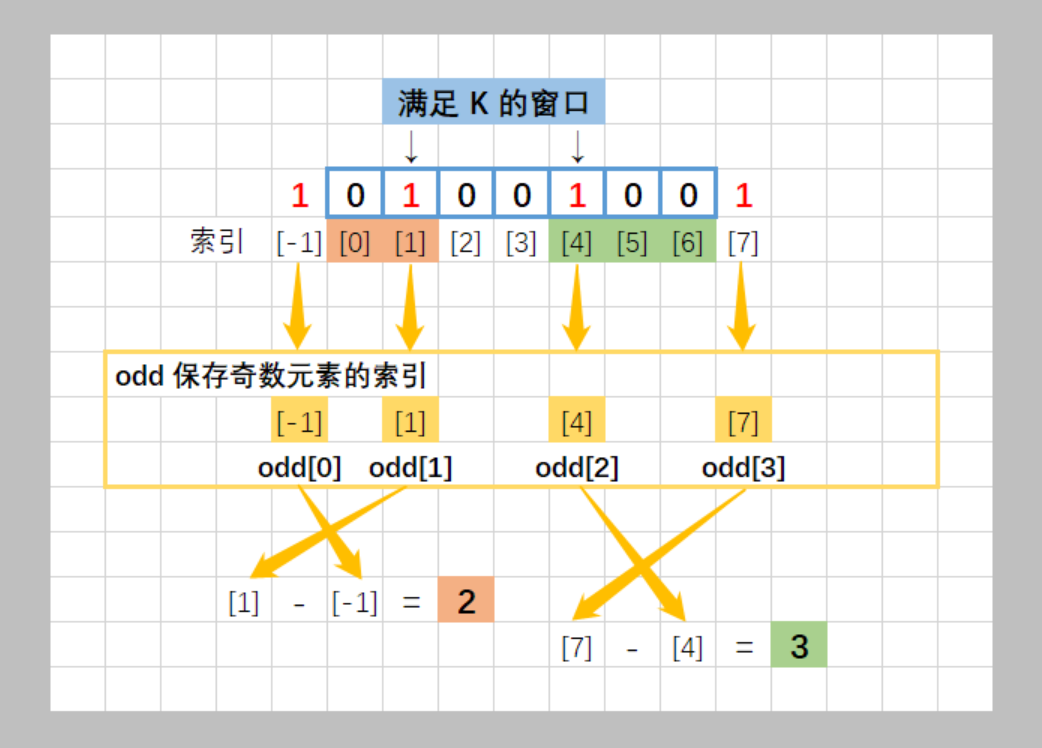

In [ ]:
# 1248. 统计「优美子数组」
# https://leetcode.cn/problems/count-number-of-nice-subarrays/

class Solution: # 再用滑动窗口做一遍
    def numberOfSubarrays(self, nums: List[int], k: int) -> int:
        pass